In [86]:
# --- Matrix Class --- 

from Array import Array2D

class Matrix(Array2D):

    def __init__(self,numRows,numCols):
        super().__init__(numRows,numCols)
        self._shape = numRows , numCols

    # Multiple Scalar 
    def scaleBy(self,scalar):

        newMatrix = Matrix(self.numRows() , self.numCols())
        for i in range( self.numRows()):
            for j in range( self.numCols()):
                newMatrix[i,j] = self[i,j] * scalar
        return newMatrix

    # Square all data
    def square(self):
        for i in range(self.numRows()):
            for j in range(self.numCols()):
                self[i,j] = self[i,j] * self[i,j]

    # Transpose สลับแถวกับหลัก
    def transpose(self):
        newMatrix = Matrix(self.numCols() , self.numRows())
        for i in range( self.numRows()):
            for j in range( self.numCols()):
                newMatrix[j,i] = self[i,j]
        return newMatrix

    # Addition
    def __add__ ( self , rhsMatrix ) :
        assert rhsMatrix.numRows() == self.numRows() and rhsMatrix.numCols() == self.numCols() ,\
            "Matrix size not compatible for the add operation."
        newMatrix = Matrix( self.numRows() , self.numCols() )
        for i in range( self.numRows() ):
            for j in range( self.numCols() ) :
                newMatrix[i,j] = self[i,j] + rhsMatrix[i,j]
        return newMatrix
        
    # Subtraction
    def __sub__ ( self , rhsMatrix ) :
        assert rhsMatrix.numRows() == self.numRows() and rhsMatrix.numCols() == self.numCols() ,\
            "Matrix size not compatible for the add operation."
        newMatrix = Matrix( self.numRows() , self.numCols() )
        for i in range( self.numRows() ):
            for j in range( self.numCols() ) :
                newMatrix[i,j] = self[i,j] - rhsMatrix[i,j]
        return newMatrix
    
    # Element-wise Multiplication
    def __mul__ ( self , rhsMatrix):
        assert rhsMatrix.numRows() == self.numRows() and rhsMatrix.numCols() == self.numCols() ,\
            "Matrix size not compatible for the add operation."
        newMatrix = Matrix( self.numRows(), self.numCols())
        for i in range( self.numRows() ):
            for j in range( self.numCols() ) :
                newMatrix[i,j] = self[i,j] * rhsMatrix[i,j]
        return newMatrix    

    # Dot Product
    def dotproduct(self,rhsMatrix):
        assert self.numCols() == rhsMatrix.numRows() , "Cannot multiply these matrices."
        newMatrix = Matrix( self.numRows() , rhsMatrix.numCols())
        for i in range(self.numRows()):
            for j in range(rhsMatrix.numCols()):
                total = 0
                for k in range(rhsMatrix.numRows()):
                     total += self[i,k] * rhsMatrix[k,j]
                newMatrix[i,j] = total
        return newMatrix

    #Load list
    def loadList(self,data):
        # Check that they has 1 column or more. 
        data_column = len(data[0])
        data_row = len(data)
            
        assert (self.numCols() == data_column and self.numRows() == data_row) , "incorrect size to load data to matrix."
        for i in range(data_row):
            for j in range(data_column):
                self[i,j] = data[i][j]

    def reshape(self,row,col):
        
        # เช็คว่าขนาดในการ Reshape เท่ากันไหม
        assert (row * col == self.numRows() * self.numCols()) , "Size couldn't fit in the Array2D"
        
        # 1 Solution - เข้าถึง matrix ก่อน แล้วดึงเข้า list เปล่า
        number_list = []
        for i in range(self.numRows()):
            for j in range(self.numCols()):
                number_list.append(self[i,j])

        # 2 Solution - เข้าถึง Matrix รูปร่างใหม่ แล้ว Assign ค่าลงไปผ่าน list เดี่ยว (ใช้ index บวกไปเรื่อยๆ)
        
        newMatrix = Array2D(row,col)
        ndx = 0

        for i in range(row):
            for j in range(col):
                newMatrix[i,j] = number_list[ndx]
                ndx += 1

        return newMatrix
    
    # Load Function - Let every data in hidden goes through the activate function.
    def loadFunction(self,activate_function):        
        for i in range(self.numRows()):
            for j in range(self.numCols()):
                self[i,j] = activate_function(self[i,j])

    # Average - compute the weighted average of all the data
    def average(self):
        total = 0
        for i in range(self.numRows()):
            for j in range(self.numCols()):
                total += self[i,j]

        average = total / (self.numRows() * self.numCols())
        return average
                
    # Trace Method (ผลบวกทแยงมุม)

    # Argmax
    def argmax_zero_axis(self):

        ''' 
            Input :
            [ [0... 30],
              [0... 30],
              [1... 30]
            ]
            แนวตั้งจะแทน ตัวข้อมูลนึง เช่น 001 , 010 , 100
        '''
        index = []
        print(self)
        for j in range(self.numCols()):

            # กำหนดให้ตัวแถวแรกเป็น max_value
            max_value = self[0, j]
            max_index = 0
            for i in range(self.numRows()):
                print(self[i,j])
                if max_value < self[i, j]:
                    max_value = self[i,j]
                    max_index = i
            else:
                index.append(max_index)

        return index
                    
        

    

In [87]:
# --- ANN Model Class ---
import random
import math
import statistics

class ANN_Model():
    def __init__(self,file): 
        with open(file,'r') as f:
            self._RawData = f.readlines()

    def cleanData(self):

        newData = []
        resultData = []
        for row in self._RawData:
            check_row = row.split(',')
            last = check_row.pop()
            resultData.append(last[0])


            check_row = [float(num) for num in check_row]

            # Column
            current_row = []
            for column in range(len(check_row)):
                if (column != 1 and column != len(check_row) - 1 ):
                    current_row.append(check_row[column])
  
            newData.append(current_row)

        # self.Normalization(newData,resultData)
        self._RawTrainData = newData

        # result Data is ['g','b','g',...]
        rawtestdata = []
        for result in resultData:
            if result == "g":
                rawtestdata.append([1,0])
            elif result == "b":
                rawtestdata.append([0,1])

        self._RawTestData = rawtestdata

        # Create instant variables for hyperparameter
        X = self._RawTrainData
        y = self._RawTestData

        self._NumData = len(X)
        self._NumInput = len(X[0])
        self._NumOutput = len(y[0])

        

    # Rescaling Min-Max Normalization

    def StandardScaler(self):

        # Evaluate the mean and variance of all inputs

        all_input_data = []
        for i in range(len(self._RawTrainData)):
            for j in range(len(self._RawTrainData[0])):
                all_input_data.append(self._RawTrainData[i][j])

        # Standard Scaler = x(i) - mean / S.D -> S.D = Variance**2

        mean = statistics.mean(all_input_data)

        stdev = statistics.stdev(all_input_data)

        print("Mean : " , mean)
        print("S.D. : " , stdev)

        Scaled_Train_Data = []
        for i in range(len(self._RawTrainData)):

            scaled_data = []
            for j in range(len(self._RawTrainData[0])):
                newScale = (self._RawTrainData[i][j] - mean) / stdev
                scaled_data.append(newScale)

            Scaled_Train_Data.append(scaled_data)
        
        self._RawTrainData = Scaled_Train_Data

    def MinMax_Normalization(self):
        Scaled_Train_Data = []
        for column in self._RawTrainData:
            scaled_data = []
            min_vals = min(column)
            max_vals = max(column)
            for value in column:
                newScale = (value - min_vals) / (max_vals - min_vals)
                scaled_data.append(newScale)

            Scaled_Train_Data.append(scaled_data)

        self._RawTrainData = Scaled_Train_Data

    # Data Spliting
    def splitData(self):

        self._Train_X , self._Train_y , self._Test_X , self._Test_y = [] , [] , [] , []
        
        # K-fold Cross Validation โดย k เป็น 5

        X = self._RawTrainData
        y = self._RawTestData

        random.shuffle(X)
        random.shuffle(y)


        for i in range(len(self._RawTrainData)):
            if (i%5 == 4):
                self._Test_X.append(X[i])
                self._Test_y.append(y[i])
            else:
                self._Train_X.append(X[i])
                self._Train_y.append(y[i])

        self._NumTrain = len(self._Train_X)
        self._NumTest = len(self._Test_X)

        Input_Train = Matrix(len(self._Train_X),len(self._Train_X[0]))
        Input_Train.loadList(self._Train_X)
        # Input in matrix form
        self._Input_Train = Input_Train.transpose()

        Output_Train = Matrix(len(self._Train_y),len(self._Train_y[0]))
        Output_Train.loadList(self._Train_y)
        # Output in matrix form
        self._Output_Train = Output_Train.transpose()

        Input_Test = Matrix(len(self._Test_X), len(self._Test_X[0]))
        Input_Test.loadList(self._Test_X)
        
        self._Input_Test = Input_Test.transpose()

        Output_Test = Matrix(len(self._Test_y), len(self._Test_y[0]))
        Output_Test.loadList(self._Test_y)

        self._Output_Test = Output_Test.transpose()

        

    def hyperparameter(self):
        # Rules of Thumbs
        self._NumHidden = int((2/3) * (self._NumInput + self._NumOutput))
        print("No.Input Unit: ",self._NumInput)
        print("No.Hidden Layer: ", 1)
        print("No.Hidden Unit: ",self._NumHidden)
        print("No.Output Unit: ",self._NumOutput)
    
    def trainModel(self,random_state=None,epochs=50,initial_alpha=0.01,lmbda=0.01,cycle_epochs=10):

        # กำหนด Random Seed
        if random_state is not None:
            random.seed(random_state)
            print("Random Seed :" , random_state)
        else: 
            random.seed(42)
            print("Random Seed :" , 42)

        # Random weights between input and hidden

        # --- Uniform Weight Initialization 
        
        self._weights_input_hidden = Matrix(self._NumInput , self._NumHidden)
        for i in range(self._NumInput):
            for j in range(self._NumHidden):
                self._weights_input_hidden[i,j] = random.uniform(-1,1)

        # Random weights between hidden and output

        self._weights_hidden_output = Matrix(self._NumHidden , self._NumOutput)
        for i in range(self._NumHidden):
            for j in range(self._NumOutput):
                self._weights_hidden_output[i,j] = random.uniform(-1,1)

        # Xavier/Godot Random weights between input and hidden
        # self._weights_input_hidden = Matrix(self._NumInput, self._NumHidden)
        # for i in range(self._NumInput):
        #     for j in range(self._NumHidden):
        #         limit = math.sqrt(2 / self._NumInput)
        #         self._weights_input_hidden[i, j] = random.uniform(-limit, limit)

        # # Random weights between hidden and output
        # self._weights_hidden_output = Matrix(self._NumHidden, self._NumOutput)
        # for i in range(self._NumHidden):
        #     for j in range(self._NumOutput):
        #         limit = math.sqrt(2 / self._NumHidden)
        #         self._weights_hidden_output[i, j] = random.uniform(-limit, limit)

        Input = self._Input_Train
        Target = self._Output_Train

        losses = []

        # Sigmoid - Activate Function 
        def sigmoid(x): # หรือ Logistic Function
            return 1 / (1 + math.exp(-x))
        
        # ReLu - Activate Function
        def relu(x):
            return max(0, x)
        
        alpha = initial_alpha
        cycle_count = 0

        # Training Loop
        for epoch in range(epochs):

            random_list = [int(i) for i in range(self._NumTrain)]
            Train_seq = random.sample(random_list,self._NumTrain)

            for seq_num in range(self._NumTrain):

                # Select Column ([:,Train_seq[i]])
                input_selected_column = []
                for i in range(Input.numRows()):
                    for j in range(Input.numCols()):
                        if (j == Train_seq[seq_num]):
                            input_selected_column.append(Input[i,j])

                input_selected_column_Matrix = Matrix(1,len(input_selected_column))
                for i in range(len(input_selected_column)):
                    input_selected_column_Matrix[0,i] = input_selected_column[i]
                input_selected_column_Matrix = input_selected_column_Matrix.transpose()

                # Feed Forward

                Hidden = self._weights_input_hidden.transpose().dotproduct(input_selected_column_Matrix)

                Hidden.loadFunction(relu)

                Output = self._weights_hidden_output.transpose().dotproduct(Hidden)
                Output.loadFunction(relu)

                # --- Backpropagation Algorithm
                target_selected_column = []
                for i in range(Target.numRows()):
                    for j in range(Target.numCols()):
                        if (j == Train_seq[seq_num]):
                            target_selected_column.append(Target[i,j])

                # Target Select Column - 
                target_selected_column_Matrix = Matrix(1,len(target_selected_column))
                for i in range(len(target_selected_column)):
                    target_selected_column_Matrix[0,i] = target_selected_column[i]
                target_selected_column_Matrix = target_selected_column_Matrix.transpose()
                Error = target_selected_column_Matrix - Output
                # Without no scaling factor
                Error.scaleBy(1/2)

                Error_wrt_output = target_selected_column_Matrix - Output
                Error_wrt_output.scaleBy(-1)

                # oneminus_Output = 1 - Output
                oneminus_Output = Matrix(Output.numRows(),Output.numCols())
                oneminus_Output.clear(1) 
                Output_wrt_outputLayer_LinearTransform = Output * (oneminus_Output - Output)
                OutputLayer_LinearTransform_wrt_weights_hidden_output = Hidden
                Error_wrt_weights_hidden_output = OutputLayer_LinearTransform_wrt_weights_hidden_output.dotproduct((Error_wrt_output * Output_wrt_outputLayer_LinearTransform).transpose())
                
                # oneminus_Hidden = 1 - Hidden
                oneminus_Hidden = Matrix(Hidden.numRows(),Hidden.numCols())
                oneminus_Hidden.clear(1)
                HiddenLayer_activations_wrt_hiddenLayer_linearTransform = Hidden * (oneminus_Hidden - Hidden)
                OutputLayer_LinearTransform_wrt_hiddenLayer_activations = self._weights_hidden_output
                HiddenLayer_linearTransform_wrt_weights_input_hidden = input_selected_column_Matrix
                Error_wrt_weights_input_hidden = HiddenLayer_linearTransform_wrt_weights_input_hidden.dotproduct(\
                    (HiddenLayer_activations_wrt_hiddenLayer_linearTransform *\
                     (OutputLayer_LinearTransform_wrt_hiddenLayer_activations\
                    .dotproduct (Output_wrt_outputLayer_LinearTransform * Error_wrt_output))).transpose())
                
                # L2 regularization term for hidden to output weights
                # l2_hidden_output = self._weights_hidden_output.scaleBy(lmbda)

                # # L2 regularization term for input to hidden weights
                # l2_input_hidden = self._weights_input_hidden.scaleBy(lmbda)
                
                # # Update weights with regularization terms
                # self._weights_hidden_output = self._weights_hidden_output - (
                #     Error_wrt_weights_hidden_output.scaleBy(alpha) + l2_hidden_output
                # )
                # self._weights_input_hidden = self._weights_input_hidden - (
                #     Error_wrt_weights_input_hidden.scaleBy(alpha) + l2_input_hidden
                # )

                #Normal Updating weights term
                self._weights_hidden_output = self._weights_hidden_output - Error_wrt_weights_hidden_output.scaleBy(alpha)
                self._weights_input_hidden = self._weights_input_hidden - Error_wrt_weights_input_hidden.scaleBy(alpha)

            if epoch % cycle_epochs == 0:
                cycle_count += 1
                alpha = initial_alpha * (0.9 ** cycle_count)

            epoch_loss = Error.average()
            if epoch % 10 == 0:
                print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

            losses.append(epoch_loss)

        # Visualizing the error
        import matplotlib.pyplot as plt
        arange = [int(i) for i in range(1,epochs+1)]
        plt.plot(arange, losses)

    def testModel(self):
        Input = self._Input_Test
        Target = self._Output_Test

        def sigmoid(x): # หรือ Logistic Function
            return 1 / (1 + math.exp(-x))
        
        def relu(x):
            return max(0, x)

                # Forward Propogation

        Hidden = self._weights_input_hidden.transpose().dotproduct(Input)
        Hidden.loadFunction(relu)

                # Calculating the output
        Output = self._weights_hidden_output.transpose().dotproduct(Hidden)
        Output.loadFunction(relu)

        Class_Output = Output.argmax_zero_axis()
        self._class_output = Class_Output
        print("Class_Output : ")
        print(Class_Output)
        Class_Target = Target.argmax_zero_axis()
        self._class_target = Class_Target
        # print("Class_Target : ")
        # print(Class_Target)
        correct = 0
        miss = 0

        conf_matrix = Matrix(self._NumOutput , self._NumOutput)
        conf_matrix.clear(0)
        for i in range(self._NumTest):
            if Class_Output[i] == Class_Target[i]:
                correct += 1
            else:
                miss += 1
            conf_matrix[Class_Target[i],Class_Output[i]] += 1
                
        print('Confusion Matrix (row=Actual, col=Predicted)')
        print(conf_matrix)
        print('accuracy = {0:.2f}%'.format(correct/self._NumTest))

In [88]:
# --- 2. Data preprocessing

myModel = ANN_Model('ionosphere_data.csv')
myModel.cleanData()

In [89]:
myModel._RawTrainData

[[1.0,
  0.99539,
  -0.05889,
  0.85243,
  0.02306,
  0.83398,
  -0.37708,
  1.0,
  0.0376,
  0.85243,
  -0.17755,
  0.59755,
  -0.44945,
  0.60536,
  -0.38223,
  0.84356,
  -0.38542,
  0.58212,
  -0.32192,
  0.56971,
  -0.29674,
  0.36946,
  -0.47357,
  0.56811,
  -0.51171,
  0.41078,
  -0.46168,
  0.21266,
  -0.3409,
  0.42267,
  -0.54487,
  0.18641],
 [1.0,
  1.0,
  -0.18829,
  0.93035,
  -0.36156,
  -0.10868,
  -0.93597,
  1.0,
  -0.04549,
  0.50874,
  -0.67743,
  0.34432,
  -0.69707,
  -0.51685,
  -0.97515,
  0.05499,
  -0.62237,
  0.33109,
  -1.0,
  -0.13151,
  -0.453,
  -0.18056,
  -0.35734,
  -0.20332,
  -0.26569,
  -0.20468,
  -0.18401,
  -0.1904,
  -0.11593,
  -0.16626,
  -0.06288,
  -0.13738],
 [1.0,
  1.0,
  -0.03365,
  1.0,
  0.00485,
  1.0,
  -0.12062,
  0.88965,
  0.01198,
  0.73082,
  0.05346,
  0.85443,
  0.00827,
  0.54591,
  0.00299,
  0.83775,
  -0.13644,
  0.75535,
  -0.0854,
  0.70887,
  -0.27502,
  0.43385,
  -0.12062,
  0.57528,
  -0.4022,
  0.58984,
  -0.22145,

In [90]:
myModel._RawTestData

[[1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [0, 1],
 

In [91]:
myModel.StandardScaler()

Mean :  0.2627255564458689
S.D. :  0.5843251697755019


In [92]:
myModel._RawTrainData

[[1.261753697581421,
  1.2538642547874863,
  -0.5504051050366936,
  1.0092059593816505,
  -0.41015785189939463,
  0.9776310744471396,
  -1.0949477954059084,
  1.261753697581421,
  -0.385274446644772,
  1.0092059593816505,
  -0.7534769666263446,
  0.5730104757985539,
  -1.2188000676395427,
  0.5863763213995582,
  -1.103761381173536,
  0.9940260553508041,
  -1.1092206702218337,
  0.5466039460132149,
  -1.0005483020190455,
  0.5253657713770481,
  -0.9574558574309164,
  0.18266275196589346,
  -1.26007845379783,
  0.5226275699735132,
  -1.3253503297545912,
  0.2533768032121801,
  -1.2397301946178119,
  -0.08568098558051873,
  -1.0330302161684772,
  0.27372506239219824,
  -1.3820995538428502,
  -0.13060460235726185],
 [1.261753697581421,
  1.261753697581421,
  -0.7718571435475721,
  1.142556367733796,
  -1.0683872417916207,
  -0.6356145099629427,
  -2.0514186594193924,
  1.261753697581421,
  -0.5274726682820896,
  0.4210231841435993,
  -1.60895954012571,
  0.13963876241285264,
  -1.642570962

In [93]:
len(myModel._RawTrainData)

351

In [94]:
# --- 3. Split Data --- 

myModel.splitData()

In [95]:
print("Input in matrix form :")
print(myModel._Input_Train)

print("\nShape of Input Matrix:" , myModel._Input_Train._shape)

Input in matrix form :
[ 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.261753697581421, -0.44962217962784023, 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.261753697581421, -0.44962217962784023, 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.261753697581421, -0.44962217962784023, 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.261753697581421, -0.44962217962784023, -0.44962217962784023, 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.261753697581421, -0.44962217962784023, 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.261753697581421, 1.26175

In [96]:
print("Output in matrix form:")
print(myModel._Output_Train)

print("\nShape of Output Matrix:" , myModel._Output_Train._shape)

Output in matrix form:
[ 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0 ]
[ 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 

### 4. กำหนด Hyperparameter

* Hidden Unit จะมีค่าเท่ากับ 2/3 ของ Input + Output ตามหลัก Rule of Thumbs

In [97]:
myModel.hyperparameter()

No.Input Unit:  32
No.Hidden Layer:  1
No.Hidden Unit:  22
No.Output Unit:  2


### 5. เริ่มกระบวนการ Train

Random Seed : 7
Error at epoch 0 is -0.12385
Error at epoch 10 is -0.00863
Error at epoch 20 is -0.09591
Error at epoch 30 is 0.01454
Error at epoch 40 is -0.00018
Error at epoch 50 is -0.00986
Error at epoch 60 is 0.00745
Error at epoch 70 is -0.00014
Error at epoch 80 is -0.00097
Error at epoch 90 is -0.01080


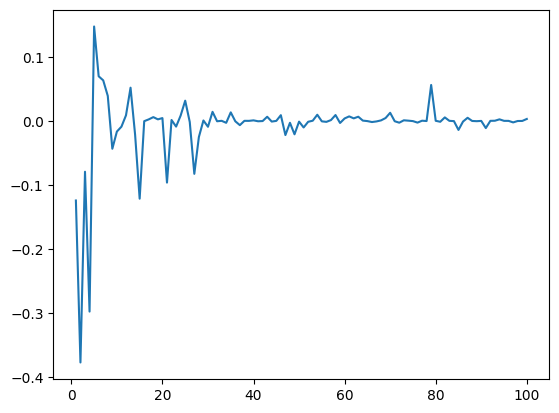

In [98]:
myModel.trainModel(7,100,0.005,0.01,10)

In [99]:
myModel._weights_hidden_output

[ -0.13918575158715815, 1.1906046003674624 ]
[ -0.2517888806593678, -0.24379452327659087 ]
[ 0.455996582189848, 0.0015596881483257614 ]
[ 0.317602629793044, -0.25225880296684666 ]
[ -0.9884143654668582, 0.9911489643572944 ]
[ -0.8340149589564421, 1.4045259466041977 ]
[ -0.23759364406203007, -0.34676754131021825 ]
[ -1.15739952010253, 0.5592035279745579 ]
[ -0.36949070004237927, 1.5257565700767437 ]
[ -1.1814627855168083, 0.22927857440453245 ]
[ -0.8254523385201304, 1.1976043219150472 ]
[ -1.1466203944607358, -0.47210495742703845 ]
[ -1.2959015073574467, 0.176757286325992 ]
[ 0.18732230885702167, 1.3813565963169274 ]
[ -0.08098235560271687, 1.415732190122311 ]
[ 0.3110196277260043, 0.11964004493047166 ]
[ -1.0353721668369202, 1.3053832272451469 ]
[ -0.27578437846114107, -0.1899656686417467 ]
[ -0.001560842141823947, 0.08502708301982775 ]
[ -0.527609498869991, -0.009998570983982198 ]
[ -1.3580831793133588, -0.22510144912354177 ]
[ -0.6793685716467766, 0.1042631694859134 ]

In [100]:
myModel.testModel()

[ 0.0004270844670181437, 0.00036778788854305907, 0.013354028320185353, 0.0027838941945838086, 0.02248673104631581, 0.0022068124176218462, 0.0034122307186038765, 0.0012998253371679337, 0.0004944472070639857, 0.00059691635885187, 0.0033923344670367286, 0.0007385618099813922, 0.0009003065338788509, 0.004077028733235577, 0.0014872643993604161, 0.0009427862882129194, 0.000553704507777661, 0.00269289132521456, 0.001565417811424353, 0.001140310487590471, 0.0017186509372811504, 0.0011820142546700263, 0.01418044290618648, 0.0015474221439210705, 0.0006134683465840679, 0.0009716253702748108, 0.00041349455522778826, 0.0016820440158879493, 0.00038221876767684427, 0.0008658552143925099, 0.00295558037936879, 0.003733313288625617, 0.0009027697409809891, 0.006415571790953117, 0.002612547647728682, 0.0008055751756117283, 0.0006424189738764305, 0.002439884379923485, 0.005203497736750574, 0.0008401632950176281, 0.004343425559826418, 0.002074143831235199, 0.0005621670494069557, 0.0006974236593782228, 0.000

In [101]:
myModel._class_output

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [102]:
myModel._class_target

[1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0]